In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('F:\\datasets\\titanic\\train.csv')
df = file.copy()
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
age = df['Age'].to_numpy().reshape(-1,1)
Embarked = df['Embarked'].to_numpy().reshape(-1,1)
df = df.drop(['PassengerId','Name','Ticket','Cabin','Age','Embarked'],axis=1)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputed_age = pd.DataFrame(imputer.fit_transform(age),columns=['Age'])
imputed_Em = pd.DataFrame(imputer2.fit_transform(Embarked),columns=['Embarked'])
df = pd.concat([df,imputed_age,imputed_Em],axis=1)
for i in df.columns :
    print(i)
    print(df[i].value_counts(ascending=False))

Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Age         0
Embarked    0
dtype: int64

In [7]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
encoded_df = pd.get_dummies(df)
encoded_df.sample(10)

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
846,0,3,8,2,69.5500,29.699118,0,1,0,0,1
516,1,2,0,0,10.5000,34.000000,1,0,0,0,1
529,0,2,2,1,11.5000,23.000000,0,1,0,0,1
376,1,3,0,0,7.2500,22.000000,1,0,0,0,1
377,0,1,0,2,211.5000,27.000000,0,1,1,0,0
836,0,3,0,0,8.6625,21.000000,0,1,0,0,1
696,0,3,0,0,8.0500,44.000000,0,1,0,0,1
235,0,3,0,0,7.5500,29.699118,1,0,0,0,1
299,1,1,0,1,247.5208,50.000000,1,0,1,0,0
238,0,2,0,0,10.5000,19.000000,0,1,0,0,1


In [9]:
encoded_df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,29.699118,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,1.102743,0.806057,49.693429,13.002015,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,29.699118,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


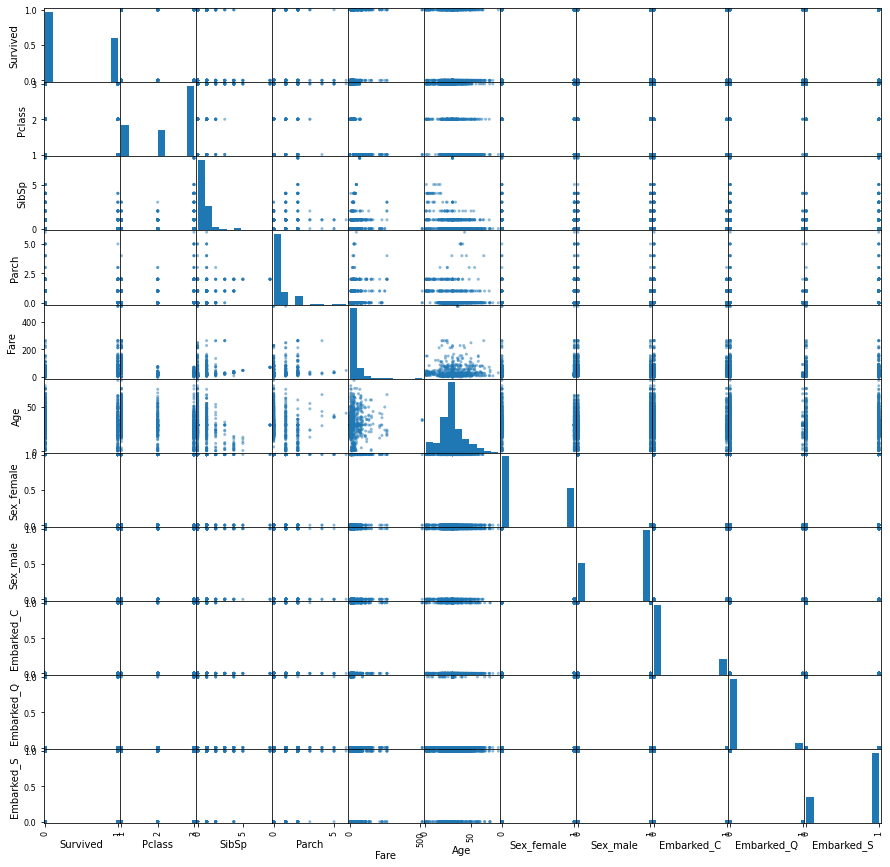

In [10]:
pd.plotting.scatter_matrix(encoded_df[encoded_df.columns],figsize=(15,15))
plt.show()

In [11]:
label = encoded_df['Survived']
encoded_df = encoded_df.drop(['Survived'],axis=1)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Age         891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sacled_df = pd.DataFrame(scaler.fit_transform(encoded_df),columns=encoded_df.columns)
sacled_df.describe()

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,3.456519e-16,6.716164e-17,-4.373606e-17,2.562796e-16,3.162453e-16,-4.059603e-16,1.167541e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-2.253155e+00,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-3.693648e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.924806e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,8.273772e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,0.000000e+00,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,8.273772e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,4.079260e-01,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,8.273772e-01,6.784163e+00,6.974147e+00,9.667167e+00,3.870872e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01


In [13]:
from sklearn.model_selection import train_test_split
xtr , xts , ytr , yts = train_test_split(sacled_df,label,test_size=0.2,random_state=32)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
alg = GradientBoostingClassifier().fit(xtr,ytr)
alg.score(xtr,ytr)*100

90.30898876404494

In [15]:
alg.score(xts,yts)*100

82.68156424581005

In [16]:
alg.score(sacled_df,label)*100

88.7766554433221

In [17]:
bad_score = 0
for i in range(1,21) :
    xtr , xts , ytr , yts = train_test_split(sacled_df,label,test_size=0.2,shuffle=True)
    alg = GradientBoostingClassifier().fit(xtr,ytr)
    if (alg.score(xtr,ytr)*100) - (alg.score(xts,yts)*100) >= 15 :
        bad_score+=1
bad_score

0